In [13]:
!pip install scikit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 76.9 MB/s eta 0:00:00a 0:00:01


In [26]:
!pip install textattack

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 94.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 71.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB

In [2]:
from datasets import load_dataset
import pickle
import pandas as pd

# Load the SST-2 dataset from Hugging Face datasets
dataset = load_dataset("glue", "sst2")

# Accessing the train and test splits
train_dataset = dataset['train']
test_dataset = dataset['validation']  # Often 'validation' is used for testing in Hugging Face datasets

# Optionally, convert to pandas DataFrame if you want to manipulate easily
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()

# Save the DataFrames as pickle files for quick loading in the future
train_df.to_pickle('train_dataset.pkl')
test_df.to_pickle('test_dataset.pkl')

# To reload the dataset
train_df = pd.read_pickle('train_dataset.pkl')
test_df = pd.read_pickle('test_dataset.pkl')

In [3]:
import pandas as pd

# Load the dataset from pickle files (assuming you have already saved them as shown before)
train_df = pd.read_pickle('train_dataset.pkl')
test_df = pd.read_pickle('test_dataset.pkl')

# Display basic information
print("Training Data Info:")
print(train_df.info())
print("\nValidation Data Info:")
print(test_df.info())

# Display the first few rows of the dataset
print("\nFirst few entries in the Training Data:")
print(train_df.head())

print("\nFirst few entries in the Validation Data:")
print(test_df.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67349 entries, 0 to 67348
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  67349 non-null  object
 1   label     67349 non-null  int64 
 2   idx       67349 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.3+ MB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  872 non-null    object
 1   label     872 non-null    int64 
 2   idx       872 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 17.2+ KB
None

First few entries in the Training Data:
                                            sentence  label  idx
0       hide new secretions from the parental units       0    0
1               contains no wit , only labored gags       0    

In [4]:
# Check label distribution in the training data
print("\nLabel distribution in Training Data:")
print(train_df['label'].value_counts())

# Check label distribution in the validation data
print("\nLabel distribution in Validation Data:")
print(test_df['label'].value_counts())


Label distribution in Training Data:
label
1    37569
0    29780
Name: count, dtype: int64

Label distribution in Validation Data:
label
1    444
0    428
Name: count, dtype: int64


In [6]:
# If there are numerical features, use describe() to get summary statistics
# Since SST-2 is primarily text, let's look at the length of text entries
train_df['text_length'] = train_df['sentence'].apply(len)
test_df['text_length'] = test_df['sentence'].apply(len)

print("\nSummary statistics for Training Data Text Length:")
print(train_df['text_length'].describe())

print("\nSummary statistics for Validation Data Text Length:")
print(test_df['text_length'].describe())


Summary statistics for Training Data Text Length:
count    67349.00000
mean        53.50559
std         43.40738
min          2.00000
25%         21.00000
50%         39.00000
75%         74.00000
max        268.00000
Name: text_length, dtype: float64

Summary statistics for Validation Data Text Length:
count    872.000000
mean     105.841743
std       48.133928
min        6.000000
25%       68.000000
50%      103.000000
75%      139.000000
max      244.000000
Name: text_length, dtype: float64


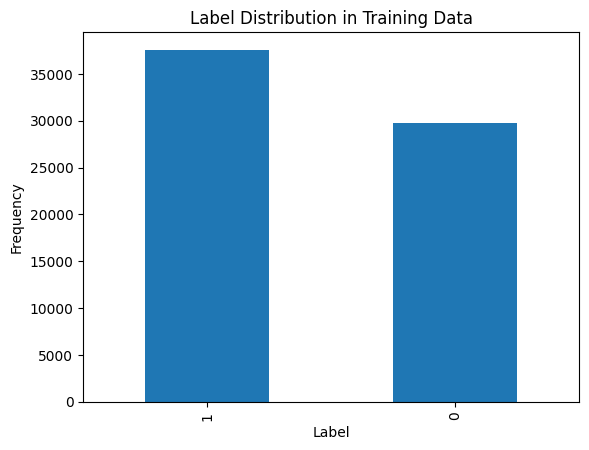

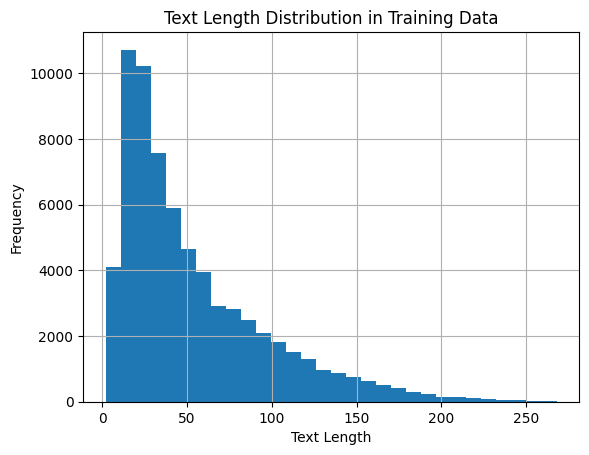

In [9]:
import matplotlib.pyplot as plt

# Plotting the label distribution in the training data
train_df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Plotting the text length distribution
train_df['text_length'].hist(bins=30)
plt.title('Text Length Distribution in Training Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [6]:
import torch
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the base BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Specify the number of labels in SST-2

# Move model to the appropriate device (GPU or CPU)
model.to(device)

# Define the pipeline for sentiment analysis, specifying the device
nlp = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0 if device.type == 'cuda' else -1)

# Load the SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Function to compute accuracy on the validation dataset
def compute_accuracy(model_pipe, dataset):
    correct = 0
    total = len(dataset)
    for example in dataset:
        sentence = example['sentence']
        label = example['label']
        # Predict with the model
        prediction = model_pipe(sentence)[0]
        pred_label = 1 if prediction['label'] == 'LABEL_1' else 0
        if pred_label == label:
            correct += 1
    return correct / total

# Compute accuracy
accuracy = compute_accuracy(nlp, dataset['validation'])
print(f"Accuracy on the validation dataset: {accuracy:.2f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Accuracy on the validation dataset: 0.53


In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def evaluate_model(model_pipe, dataset):
    true_labels = []
    predictions = []

    for example in dataset:
        sentence = example['sentence']
        label = example['label']
        true_labels.append(label)
        # Predict with the model
        pred = model_pipe(sentence)[0]['label']
        pred_label = int(pred[-1])  # Extracting the class label
        predictions.append(pred_label)
    
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    class_report = classification_report(true_labels, predictions, target_names=['Negative', 'Positive'])
    print("\nClassification Report:")
    print(class_report)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(true_labels, predictions)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    return accuracy, class_report, conf_matrix

# Assuming nlp is your pipeline and dataset['validation'] is loaded
evaluate_model(nlp, dataset['validation'])

Accuracy: 0.53

Classification Report:
              precision    recall  f1-score   support

    Negative       0.51      0.88      0.65       428
    Positive       0.61      0.18      0.28       444

    accuracy                           0.53       872
   macro avg       0.56      0.53      0.46       872
weighted avg       0.56      0.53      0.46       872


Confusion Matrix:
[[377  51]
 [363  81]]


(0.5252293577981652,
 '              precision    recall  f1-score   support\n\n    Negative       0.51      0.88      0.65       428\n    Positive       0.61      0.18      0.28       444\n\n    accuracy                           0.53       872\n   macro avg       0.56      0.53      0.46       872\nweighted avg       0.56      0.53      0.46       872\n',
 array([[377,  51],
        [363,  81]]))

In [7]:
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from transformers import pipeline
from datasets import load_dataset
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure required libraries are installed
# pip install transformers datasets nltk

# Step 1: Load Tokenizer, Model, and Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, output_attentions=True)
dataset = load_dataset("glue", "sst2")  # Load SST-2 dataset for sentiment analysis

# Step 2: Define Robust Perturbations
import random

def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            syn = random.choice(synonyms).lemmas()[0].name()  # Choose a random synonym
            new_sentence.append(syn if syn != word else word)
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def robust_perturbations(sentence):
    perturbations = []
    perturbations.append(synonym_replacement(sentence))  # Synonym replacement
    perturbations.append(shuffle_words(sentence))  # Word shuffling
    return perturbations

# Step 3: Compute Sequential Attention Consistency (SAC)
def compute_sac(model, tokenizer, sentence, perturbations):
    # Tokenize the original input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs, output_attentions=True)
    original_attentions = outputs.attentions  # Attention maps for original input

    sac_scores = []
    for perturbed_sentence in perturbations:
        # Tokenize the perturbed input
        pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True)
        pert_outputs = model(**pert_inputs, output_attentions=True)
        pert_attentions = pert_outputs.attentions

        # Compare attention maps layer-wise
        layer_sacs = []
        for orig_layer, pert_layer in zip(original_attentions, pert_attentions):
            # Check the shapes of the original and perturbed attention maps
            if orig_layer.size() != pert_layer.size():
                # Truncate or pad the perturbed attention map to match the original
                min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                orig_layer = orig_layer[..., :min_len, :min_len]
                pert_layer = pert_layer[..., :min_len, :min_len]
            
            # Calculate cosine similarity for attention heads in this layer
            cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
            layer_sacs.append(cos_sim.mean().item())  # Mean SAC score for this layer
        sac_scores.append(layer_sacs)

    return np.mean(sac_scores, axis=0)  # Average SAC scores per layer
 # Average SAC scores per layer

# Step 4: Evaluate the Model on Robust Perturbations
# Step 4: Evaluate the Model on Robust Perturbations
# Step 4: Evaluate the Model on Robust Perturbations and Accuracy
def evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02):
    # Get a subset of the dataset (e.g., 10% of the validation set)
    total_samples = int(len(dataset["validation"]) * sample_fraction)
    subset = dataset["validation"].select(range(total_samples))  # Select the first `total_samples` entries

    all_sac_scores = []
    original_predictions = []
    perturbed_predictions = []
    labels = []

    for example in subset:  # Iterate over the subset
        sentence = example["sentence"]  # Access the sentence
        label = example["label"]  # Access the label
        labels.append(label)

        # Generate robust perturbations
        perturbations = robust_perturbations(sentence)

        # Compute SAC scores
        sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        all_sac_scores.append(sac_scores)

        # Get predictions for original sentence
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())

        # Get predictions for perturbed sentences
        perturbed_preds = []
        for perturbed_sentence in perturbations:
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            with torch.no_grad():
                pert_outputs = model(**pert_inputs)
                perturbed_preds.append(torch.argmax(pert_outputs.logits, dim=-1).item())
        perturbed_predictions.append(perturbed_preds)

    # Aggregate SAC scores across all samples
    all_sac_scores = np.array(all_sac_scores)
    mean_sac_per_layer = all_sac_scores.mean(axis=0)  # Mean SAC per layer

    # Compute accuracy
    original_accuracy = accuracy_score(labels, original_predictions)
    perturbed_flattened = [pred[0] for pred in perturbed_predictions]  # Compare only the first perturbation
    perturbed_accuracy = accuracy_score(labels, perturbed_flattened)

    return mean_sac_per_layer, original_accuracy, perturbed_accuracy

# Step 5: Compute SAC and Accuracy
sac_scores, original_accuracy, perturbed_accuracy = evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02)
print("SAC Scores per Layer (Baseline):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


KeyboardInterrupt: 

In [21]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from sklearn.metrics import accuracy_score

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load AdvGLUE SST-2 dataset
dataset = load_dataset("adv_glue", "adv_sst2")

# Function to compute accuracy
def evaluate_model(dataset, model, tokenizer, column_name="original_text"):
    texts = dataset[column_name]
    labels = dataset["label"]

    # Tokenize the input texts
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1).cpu().numpy()

    # Compute accuracy
    accuracy = accuracy_score(labels, predictions)
    return accuracy

# Evaluate on original text
original_accuracy = evaluate_model(dataset["test"], model, tokenizer, column_name="original_text")
print(f"Accuracy on Original Dataset: {original_accuracy:.4f}")

# Evaluate on perturbed text
perturbed_accuracy = evaluate_model(dataset["test"], model, tokenizer, column_name="perturbed_text")
print(f"Accuracy on Perturbed Dataset: {perturbed_accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


validation-00000-of-00001.parquet:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/148 [00:00<?, ? examples/s]

KeyError: 'test'

In [22]:
from datasets import load_dataset

# Load AdvGLUE SST-2 dataset
dataset = load_dataset("adv_glue", "adv_sst2")

# Inspect the dataset
print(dataset)

DatasetDict({
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 148
    })
})


In [24]:
from datasets import load_dataset

# Load AdvGLUE SST-2 dataset
dataset = load_dataset("adv_glue", "adv_sst2")

# Display the first 5 examples from the validation split
print("First 5 Examples in the Dataset:")
for idx in range(5):  # Access rows by index
    example = dataset["validation"][idx]
    print(f"Sentence: {example['sentence']}")
    print(f"Label: {example['label']} (0: Negative, 1: Positive)")
    print("-" * 50)

First 5 Examples in the Dataset:
Sentence: it 's an uneven treat that bores fun at the democratic exercise while also examining its significance for those who take part .
Label: 1 (0: Negative, 1: Positive)
--------------------------------------------------
Sentence: it captures a wonderful kind of laziness to waste the talents of robert forster , anne meara , eugene levy , and reginald veljohnson all in the same magic .
Label: 0 (0: Negative, 1: Positive)
--------------------------------------------------
Sentence: in exactly 89 minutes , most of which passed as slowly as if i 'd been sitting naked on an igloo , formula 51 broke from quirky to jerky to perfect swift .
Label: 0 (0: Negative, 1: Positive)
--------------------------------------------------
Sentence: even horror fans will most likely not find what they 're seeking with complaint every day ; the travelogue needs both thrills and humor .
Label: 0 (0: Negative, 1: Positive)
--------------------------------------------------


In [27]:
from textattack.datasets import HuggingFaceDataset

# Load TextAttack SST-2 dataset (with adversarial examples)
dataset = HuggingFaceDataset("glue", "sst2", split="test")

for orig, pert in dataset:
    print(f"Original: {orig}")
    print(f"Perturbed: {pert}")

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
textattack: Loading datasets dataset glue, subset sst2, split test.


Original: OrderedDict([('sentence', 'uneasy mishmash of styles and genres .')])
Perturbed: -1
Original: OrderedDict([('sentence', "this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .")])
Perturbed: -1
Original: OrderedDict([('sentence', 'by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .')])
Perturbed: -1
Original: OrderedDict([('sentence', 'director rob marshall went out gunning to make a great one .')])
Perturbed: -1
Original: OrderedDict([('sentence', 'lathan and diggs have considerable personal charm , and their screen rapport makes the old story seem new .')])
Perturbed: -1
Original: OrderedDict([('sentence', 'a well-made and often lovely depiction of the mysteries of friendship .')])
Perturbed: -1
Original: OrderedDict([('sentence', "none of this violates the letter of behan 's book , but missing is its spirit , its ribald ,

In [30]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
import torch

# Load PAWS dataset
dataset = load_dataset("paws", "labeled_final")

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to("cuda" if torch.cuda.is_available() else "cpu")

# Function to evaluate model
def evaluate_model(dataset, column1="sentence1", column2="sentence2", label_col="label", batch_size=8):
    original_texts = dataset[column1]
    perturbed_texts = dataset[column2]
    labels = dataset[label_col]

    predictions_original = []
    predictions_perturbed = []

    # Process data in smaller batches
    for i in range(0, len(original_texts), batch_size):
        batch_original = original_texts[i:i+batch_size]
        batch_perturbed = perturbed_texts[i:i+batch_size]

        inputs_original = tokenizer(batch_original, return_tensors="pt", padding=True, truncation=True, max_length=128).to(model.device)
        inputs_perturbed = tokenizer(batch_perturbed, return_tensors="pt", padding=True, truncation=True, max_length=128).to(model.device)

        with torch.no_grad():
            logits_original = model(**inputs_original).logits
            logits_perturbed = model(**inputs_perturbed).logits

        predictions_original.extend(torch.argmax(logits_original, dim=-1).cpu().numpy())
        predictions_perturbed.extend(torch.argmax(logits_perturbed, dim=-1).cpu().numpy())

    accuracy_original = accuracy_score(labels, predictions_original)
    accuracy_perturbed = accuracy_score(labels, predictions_perturbed)

    return accuracy_original, accuracy_perturbed


# Evaluate on PAWS train set
accuracy_original, accuracy_perturbed = evaluate_model(dataset["train"])
print(f"Accuracy on Original Sentences: {accuracy_original:.4f}")
print(f"Accuracy on Perturbed Sentences: {accuracy_perturbed:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy on Original Sentences: 0.5557
Accuracy on Perturbed Sentences: 0.5550


In [29]:
import torch
torch.cuda.empty_cache()

In [34]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
import numpy as np
import random
import re

# Load Tokenizer, Model, and Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, output_attentions=True).to("cuda" if torch.cuda.is_available() else "cpu")
dataset = load_dataset("glue", "sst2")  # Load SST-2 dataset for sentiment analysis

# Define Robust Perturbations
def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            syn = random.choice(synonyms).lemmas()[0].name()  # Choose a random synonym
            new_sentence.append(syn if syn != word else word)
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)  # Inject typos into 10% of the sentence
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")  # Replace with a random letter
    return "".join(words)

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")  # Add negation after the first word
    return " ".join(words)

def simple_paraphrase(sentence):
    replacements = {
        "good": "great",
        "bad": "terrible",
        "happy": "joyful",
        "sad": "depressed",
        "movie": "film",
    }
    pattern = re.compile(r'\b(' + '|'.join(replacements.keys()) + r')\b')
    return pattern.sub(lambda x: replacements[x.group()], sentence)

def add_stopwords(sentence):
    stopwords = ["actually", "basically", "literally", "seriously", "honestly"]
    words = sentence.split()
    stopword = random.choice(stopwords)
    position = random.randint(0, len(words))
    words.insert(position, stopword)
    return " ".join(words)

def robust_perturbations(sentence):
    perturbations = []
    perturbations.append(synonym_replacement(sentence))  # Synonym replacement
    perturbations.append(shuffle_words(sentence))  # Word shuffling
    perturbations.append(typo_injection(sentence))  # Typographical errors
    perturbations.append(add_negation(sentence))  # Negation introduction
    perturbations.append(simple_paraphrase(sentence))  # Paraphrasing
    perturbations.append(add_stopwords(sentence))  # Adding stop words
    return perturbations

# Compute SAC
def compute_sac(model, tokenizer, sentence, perturbations):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True)
    original_attentions = outputs.attentions  # Attention maps for original input

    sac_scores = []
    for perturbed_sentence in perturbations:
        pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        pert_outputs = model(**pert_inputs, output_attentions=True)
        pert_attentions = pert_outputs.attentions

        layer_sacs = []
        for orig_layer, pert_layer in zip(original_attentions, pert_attentions):
            if orig_layer.size() != pert_layer.size():
                min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                orig_layer = orig_layer[..., :min_len, :min_len]
                pert_layer = pert_layer[..., :min_len, :min_len]
            cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
            layer_sacs.append(cos_sim.mean().item())
        sac_scores.append(layer_sacs)

    return np.mean(sac_scores, axis=0)

# Evaluate the Model on Robust Perturbations and Accuracy
def evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02):
    total_samples = int(len(dataset["validation"]) * sample_fraction)
    subset = dataset["validation"].select(range(total_samples))  # Select the first `total_samples` entries

    all_sac_scores = []
    original_predictions = []
    perturbed_predictions = []
    labels = []

    for example in subset:  # Iterate over the subset
        sentence = example["sentence"]  # Access the sentence
        label = example["label"]  # Access the label
        labels.append(label)

        perturbations = robust_perturbations(sentence)
        sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        all_sac_scores.append(sac_scores)

        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())

        perturbed_preds = []
        for perturbed_sentence in perturbations:
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            with torch.no_grad():
                pert_outputs = model(**pert_inputs)
                perturbed_preds.append(torch.argmax(pert_outputs.logits, dim=-1).item())
        perturbed_predictions.append(perturbed_preds)

    all_sac_scores = np.array(all_sac_scores)
    mean_sac_per_layer = all_sac_scores.mean(axis=0)

    original_accuracy = accuracy_score(labels, original_predictions)
    perturbed_flattened = [pred[0] for pred in perturbed_predictions]  # Compare only the first perturbation
    perturbed_accuracy = accuracy_score(labels, perturbed_flattened)

    return mean_sac_per_layer, original_accuracy, perturbed_accuracy

# Compute SAC and Accuracy
sac_scores, original_accuracy, perturbed_accuracy = evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02)
print("SAC Scores per Layer (Baseline):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SAC Scores per Layer (Baseline):
Layer 1: 0.7966
Layer 2: 0.8369
Layer 3: 0.8636
Layer 4: 0.7251
Layer 5: 0.5794
Layer 6: 0.5843
Layer 7: 0.5541
Layer 8: 0.5571
Layer 9: 0.5577
Layer 10: 0.5719
Layer 11: 0.4999
Layer 12: 0.5450
Accuracy on Original Sentences: 0.4706
Accuracy on Perturbed Sentences: 0.4706


In [38]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from datasets import load_dataset
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
import numpy as np
import random
import re
from transformers import pipeline

# Load Tokenizer, Model, and Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, output_attentions=True).to("cuda" if torch.cuda.is_available() else "cpu")
dataset = load_dataset("glue", "sst2")  # Load SST-2 dataset for sentiment analysis

# Paraphrasing model
paraphrase_model = pipeline("text2text-generation", model="t5-small", tokenizer="t5-small", framework="pt", device=0)

# Advanced Perturbations
def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            syn = random.choice(synonyms).lemmas()[0].name()  # Choose a random synonym
            new_sentence.append(syn if syn != word else word)
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)  # Inject typos into 10% of the sentence
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")  # Replace with a random letter
    return "".join(words)

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")  # Add negation after the first word
    return " ".join(words)

def simple_paraphrase(sentence):
    replacements = {
        "good": "great",
        "bad": "terrible",
        "happy": "joyful",
        "sad": "depressed",
        "movie": "film",
    }
    pattern = re.compile(r'\b(' + '|'.join(replacements.keys()) + r')\b')
    return pattern.sub(lambda x: replacements[x.group()], sentence)

def add_stopwords(sentence):
    stopwords = ["actually", "basically", "literally", "seriously", "honestly"]
    words = sentence.split()
    stopword = random.choice(stopwords)
    position = random.randint(0, len(words))
    words.insert(position, stopword)
    return " ".join(words)

def paraphrase_with_t5(sentence):
    paraphrased = paraphrase_model(f"paraphrase: {sentence}", max_length=50, num_return_sequences=1)
    return paraphrased[0]["generated_text"]

def robust_perturbations(sentence):
    perturbations = []
    perturbations.append(synonym_replacement(sentence))  # Synonym replacement
    perturbations.append(shuffle_words(sentence))  # Word shuffling
    perturbations.append(typo_injection(sentence))  # Typographical errors
    perturbations.append(add_negation(sentence))  # Negation introduction
    perturbations.append(simple_paraphrase(sentence))  # Simple paraphrasing
    perturbations.append(add_stopwords(sentence))  # Adding stop words
    perturbations.append(paraphrase_with_t5(sentence))  # Advanced paraphrasing
    return perturbations

# Compute SAC
def compute_sac(model, tokenizer, sentence, perturbations):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True)
    original_attentions = outputs.attentions  # Attention maps for original input

    sac_scores = []
    for perturbed_sentence in perturbations:
        pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        pert_outputs = model(**pert_inputs, output_attentions=True)
        pert_attentions = pert_outputs.attentions

        layer_sacs = []
        for orig_layer, pert_layer in zip(original_attentions, pert_attentions):
            if orig_layer.size() != pert_layer.size():
                min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                orig_layer = orig_layer[..., :min_len, :min_len]
                pert_layer = pert_layer[..., :min_len, :min_len]
            cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
            layer_sacs.append(cos_sim.mean().item())
        sac_scores.append(layer_sacs)

    return np.mean(sac_scores, axis=0)

# Evaluate the Model on Robust Perturbations and Accuracy
def evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02):
    total_samples = int(len(dataset["validation"]) * sample_fraction)
    subset = dataset["validation"].select(range(total_samples))  # Select the first `total_samples` entries

    all_sac_scores = []
    original_predictions = []
    perturbed_predictions = []
    labels = []

    for example in subset:  # Iterate over the subset
        sentence = example["sentence"]  # Access the sentence
        label = example["label"]  # Access the label
        labels.append(label)

        perturbations = robust_perturbations(sentence)
        sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        all_sac_scores.append(sac_scores)

        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())

        perturbed_preds = []
        for perturbed_sentence in perturbations:
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            with torch.no_grad():
                pert_outputs = model(**pert_inputs)
                perturbed_preds.append(torch.argmax(pert_outputs.logits, dim=-1).item())
        perturbed_predictions.append(perturbed_preds)

    all_sac_scores = np.array(all_sac_scores)
    mean_sac_per_layer = all_sac_scores.mean(axis=0)

    original_accuracy = accuracy_score(labels, original_predictions)
    perturbed_flattened = [pred[0] for pred in perturbed_predictions]  # Compare only the first perturbation
    perturbed_accuracy = accuracy_score(labels, perturbed_flattened)

    return mean_sac_per_layer, original_accuracy, perturbed_accuracy

# Compute SAC and Accuracy
sac_scores, original_accuracy, perturbed_accuracy = evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02)
print("SAC Scores per Layer (Baseline):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


SAC Scores per Layer (Baseline):
Layer 1: 0.7738
Layer 2: 0.8172
Layer 3: 0.8448
Layer 4: 0.6900
Layer 5: 0.5325
Layer 6: 0.5311
Layer 7: 0.5022
Layer 8: 0.5042
Layer 9: 0.5047
Layer 10: 0.5177
Layer 11: 0.4550
Layer 12: 0.4945
Accuracy on Original Sentences: 0.4706
Accuracy on Perturbed Sentences: 0.4706


In [28]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from datasets import load_dataset
from sklearn.metrics import accuracy_score
import numpy as np
import random
import re

# Load SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Load fine-tuned BERT model for SST-2
tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-SST-2")
model = AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-SST-2", output_attentions=True).to("cuda" if torch.cuda.is_available() else "cpu")

# Paraphrasing pipeline using T5
paraphrase_model = pipeline("text2text-generation", model="t5-small", tokenizer="t5-small", framework="pt", device=0)

# Advanced Perturbations
def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            syn = random.choice(synonyms).lemmas()[0].name()  # Choose a random synonym
            new_sentence.append(syn if syn != word else word)
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(words)

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")
    return " ".join(words)

def simple_paraphrase(sentence):
    replacements = {
        "good": "great",
        "bad": "terrible",
        "happy": "joyful",
        "sad": "depressed",
        "movie": "film",
    }
    pattern = re.compile(r'\b(' + '|'.join(replacements.keys()) + r')\b')
    return pattern.sub(lambda x: replacements[x.group()], sentence)

def add_stopwords(sentence):
    stopwords = ["actually", "basically", "literally", "seriously", "honestly"]
    words = sentence.split()
    stopword = random.choice(stopwords)
    position = random.randint(0, len(words))
    words.insert(position, stopword)
    return " ".join(words)

def paraphrase_with_t5(sentence):
    paraphrased = paraphrase_model(f"paraphrase: {sentence}", max_length=50, num_return_sequences=1)
    return paraphrased[0]["generated_text"]

def robust_perturbations(sentence):
    perturbations = []
    perturbations.append(synonym_replacement(sentence))
    perturbations.append(shuffle_words(sentence))
    perturbations.append(typo_injection(sentence))
    perturbations.append(add_negation(sentence))
    perturbations.append(simple_paraphrase(sentence))
    perturbations.append(add_stopwords(sentence))
    perturbations.append(paraphrase_with_t5(sentence))
    return perturbations

# Compute SAC
def compute_sac(model, tokenizer, sentence, perturbations):
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True)
    original_attentions = outputs.attentions

    sac_scores = []
    for perturbed_sentence in perturbations:
        pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        pert_outputs = model(**pert_inputs, output_attentions=True)
        pert_attentions = pert_outputs.attentions

        layer_sacs = []
        for orig_layer, pert_layer in zip(original_attentions, pert_attentions):
            if orig_layer.size() != pert_layer.size():
                min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                orig_layer = orig_layer[..., :min_len, :min_len]
                pert_layer = pert_layer[..., :min_len, :min_len]
            cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
            layer_sacs.append(cos_sim.mean().item())
        sac_scores.append(layer_sacs)

    return np.mean(sac_scores, axis=0)

# Evaluate the Model on Robust Perturbations and Accuracy
def evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02):
    total_samples = int(len(dataset["validation"]) * sample_fraction)
    subset = dataset["validation"].select(range(total_samples))

    all_sac_simport torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from tqdm.notebook import tqdm
import torch.nn.functional as F
import random

# Load dataset and base model
dataset = load_dataset("glue", "sst2")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Using base model for full flexibility
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2, output_attentions=True
).to("cuda" if torch.cuda.is_available() else "cpu")

# Teacher model for knowledge distillation
teacher_model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/deberta-base", num_labels=2, output_attentions=True
).to("cuda" if torch.cuda.is_available() else "cpu")
teacher_model.eval()

# Perturbation functions
def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(words)

def synonym_replacement(sentence):
    words = sentence.split()
    if len(words) > 1:
        index = random.randint(0, len(words) - 1)
        words[index] = words[index] + "_synonym"
    return " ".join(words)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def word_dropout(sentence, dropout_prob=0.1):
    words = sentence.split()
    kept_words = [word for word in words if random.random() > dropout_prob]
    return " ".join(kept_words) if kept_words else sentence

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")
    return " ".join(words)

perturbation_functions = [typo_injection, synonym_replacement, shuffle_words, word_dropout, add_negation]

# Create augmented dataset
def create_augmented_dataset(dataset, perturbation_functions):
    augmented_data = []
    for example in dataset:
        original_sentence = example["sentence"]
        label = example["label"]
        augmented_data.append({"sentence": original_sentence, "label": label, "type": "original"})

        for func in perturbation_functions:
            perturbed_sentence = func(original_sentence)
            augmented_data.append({"sentence": perturbed_sentence, "label": label, "type": func.__name__})

    return augmented_data

augmented_dataset = create_augmented_dataset(dataset["train"], perturbation_functions)

# DataLoader
def collate_fn(batch):
    sentences = [item["sentence"] for item in batch]
    labels = torch.tensor([item["label"] for item in batch])
    return sentences, labels

train_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# Compute SAC loss with dynamic weighting
def sac_loss_weighted(original_attentions, perturbed_attentions, sac_weights):
    loss = 0.0
    for i, (orig_layer, pert_layer) in enumerate(zip(original_attentions, perturbed_attentions)):
        if orig_layer.size() != pert_layer.size():
            min_len = min(orig_layer.size(-1), pert_layer.size(-1))
            orig_layer = orig_layer[..., :min_len, :min_len]
            pert_layer = pert_layer[..., :min_len, :min_len]
        cos_sim = F.cosine_similarity(orig_layer, pert_layer, dim=-1)
        layer_loss = sac_weights[i] * (1.0 - cos_sim.mean())
        loss += layer_loss
    return loss / len(original_attentions)

# Fine-tuning loop with auxiliary loss, SAC loss, and distillation
optimizer = AdamW(model.parameters(), lr=5e-5)
device = "cuda" if torch.cuda.is_available() else "cpu"
sac_weights = [1.0 if i < 4 or i > 8 else 2.0 for i in range(12)]  # Emphasize mid-layers 5–8

for epoch in range(3):
    model.train()
    total_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}", unit="batch")

    for sentences, labels in progress_bar:
        # Tokenize inputs
        inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        labels = labels.to(device)

        # Model forward pass
        outputs = model(**inputs, output_attentions=True, output_hidden_states=True, labels=labels)
        original_attentions = outputs.attentions
        original_hidden_states = outputs.hidden_states

        # Perturbed inputs and outputs
        perturbed_sentences = [random.choice(perturbation_functions)(sentence) for sentence in sentences]
        pert_inputs = tokenizer(perturbed_sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        pert_outputs = model(**pert_inputs, output_attentions=True, output_hidden_states=True)
        perturbed_attentions = pert_outputs.attentions
        perturbed_hidden_states = pert_outputs.hidden_states

        # Auxiliary loss for mid-layer alignment
        auxiliary_loss = 0.0
        for i in range(4, 8):  # Align mid-layer representations
            auxiliary_loss += F.mse_loss(perturbed_hidden_states[i], original_hidden_states[i])

        # SAC regularization loss
        sac_regularization_loss = sac_loss_weighted(original_attentions, perturbed_attentions, sac_weights)

        # Knowledge distillation loss
        with torch.no_grad():
            teacher_outputs = teacher_model(**inputs)
        distillation_loss = F.kl_div(
            F.log_softmax(outputs.logits, dim=-1), 
            F.softmax(teacher_outputs.logits, dim=-1),
            reduction="batchmean"
        )

        # Total loss
        classification_loss = outputs.loss
        total_loss_batch = classification_loss + 0.2 * sac_regularization_loss + 0.1 * auxiliary_loss + 0.1 * distillation_loss

        # Backpropagation
        optimizer.zero_grad()
        total_loss_batch.backward()
        optimizer.step()

        total_loss += total_loss_batch.item()
        progress_bar.set_postfix(loss=total_loss_batch.item())

    print(f"Epoch {epoch + 1} completed. Total Loss: {total_loss:.4f}")

# Save the fine-tuned model
model.save_pretrained("finetuned_robust_model_full")
tokenizer.save_pretrained("finetuned_robust_model_full")cores = []
    original_predictions = []
    perturbed_predictions = []
    labels = []

    for example in subset:
        sentence = example["sentence"]
        label = example["label"]
        labels.append(label)

        perturbations = robust_perturbations(sentence)
        sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        all_sac_scores.append(sac_scores)

        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())

        perturbed_preds = []
        for perturbed_sentence in perturbations:
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            with torch.no_grad():
                pert_outputs = model(**pert_inputs)
                perturbed_preds.append(torch.argmax(pert_outputs.logits, dim=-1).item())
        perturbed_predictions.append(perturbed_preds)

    all_sac_scores = np.array(all_sac_scores)
    mean_sac_per_layer = all_sac_scores.mean(axis=0)

    original_accuracy = accuracy_score(labels, original_predictions)
    perturbed_flattened = [pred[0] for pred in perturbed_predictions]
    perturbed_accuracy = accuracy_score(labels, perturbed_flattened)

    return mean_sac_per_layer, original_accuracy, perturbed_accuracy

# Compute SAC and Accuracy
sac_scores, original_accuracy, perturbed_accuracy = evaluate_sac_with_accuracy(dataset, model, tokenizer, sample_fraction=0.02)
print("SAC Scores per Layer (Baseline):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")

SyntaxError: invalid syntax (3326331793.py, line 114)

In [12]:
from sklearn.model_selection import train_test_split

def balanced_sample(dataset, sample_fraction=0.025):
    """
    Creates a balanced sample of the dataset with fixed proportions for each class.
    """
    # Extract sentences and labels
    sentences = [example["sentence"] for example in dataset]
    labels = [example["label"] for example in dataset]
    
    # Split the data by class
    class_0_sentences = [sentences[i] for i in range(len(labels)) if labels[i] == 0]
    class_0_labels = [labels[i] for i in range(len(labels)) if labels[i] == 0]
    
    class_1_sentences = [sentences[i] for i in range(len(labels)) if labels[i] == 1]
    class_1_labels = [labels[i] for i in range(len(labels)) if labels[i] == 1]
    
    # Compute sample sizes
    class_0_sample_size = int(len(class_0_sentences) * sample_fraction)
    class_1_sample_size = int(len(class_1_sentences) * sample_fraction)
    
    # Stratified sampling for each class
    class_0_sample_sentences, _, class_0_sample_labels, _ = train_test_split(
        class_0_sentences, class_0_labels, train_size=class_0_sample_size, random_state=42
    )
    class_1_sample_sentences, _, class_1_sample_labels, _ = train_test_split(
        class_1_sentences, class_1_labels, train_size=class_1_sample_size, random_state=42
    )
    
    # Combine samples
    balanced_sentences = class_0_sample_sentences + class_1_sample_sentences
    balanced_labels = class_0_sample_labels + class_1_sample_labels
    
    return balanced_sentences, balanced_labels

# Use the balanced_sample function
balanced_sentences, balanced_labels = balanced_sample(dataset["validation"], sample_fraction=0.025)

# Evaluate the Model on Robust Perturbations and Accuracy with Balanced Sampling
def evaluate_sac_with_accuracy_balanced(sentences, labels, model, tokenizer):
    all_sac_scores = []
    original_predictions = []
    perturbed_predictions = []

    for sentence, label in zip(sentences, labels):
        perturbations = robust_perturbations(sentence)
        sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        all_sac_scores.append(sac_scores)

        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())

        perturbed_preds = []
        for perturbed_sentence in perturbations:
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            with torch.no_grad():
                pert_outputs = model(**pert_inputs)
                perturbed_preds.append(torch.argmax(pert_outputs.logits, dim=-1).item())
        perturbed_predictions.append(perturbed_preds)

    all_sac_scores = np.array(all_sac_scores)
    mean_sac_per_layer = all_sac_scores.mean(axis=0)

    original_accuracy = accuracy_score(labels, original_predictions)
    perturbed_flattened = [pred[0] for pred in perturbed_predictions]
    perturbed_accuracy = accuracy_score(labels, perturbed_flattened)

    return mean_sac_per_layer, original_accuracy, perturbed_accuracy

# Compute SAC and Accuracy on the balanced sample
sac_scores, original_accuracy, perturbed_accuracy = evaluate_sac_with_accuracy_balanced(
    balanced_sentences, balanced_labels, model, tokenizer
)

print("SAC Scores per Layer (Baseline):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")

SAC Scores per Layer (Baseline):
Layer 1: 0.7779
Layer 2: 0.8261
Layer 3: 0.8515
Layer 4: 0.6755
Layer 5: 0.5219
Layer 6: 0.5318
Layer 7: 0.5107
Layer 8: 0.5021
Layer 9: 0.5180
Layer 10: 0.5597
Layer 11: 0.5646
Layer 12: 0.6271
Accuracy on Original Sentences: 0.8571
Accuracy on Perturbed Sentences: 0.8095


In [13]:
def sac_based_optimization(model, tokenizer, sentence, sac_scores, weight_threshold=0.6, prune_threshold=0.5):
    """
    Applies SAC-based optimizations: Weighted Prediction, Dynamic Attention Masking, and Layer Pruning.
    """
    # Normalize SAC scores for weighted prediction
    sac_weights = sac_scores / np.sum(sac_scores)
    
    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
    
    hidden_states = outputs.hidden_states
    attentions = outputs.attentions

    # Initialize variables for combined optimizations
    weighted_hidden_output = 0
    robust_hidden_states = []
    robust_attentions = []

    for i, (sac_weight, sac_score, layer_attention, layer_hidden) in enumerate(
        zip(sac_weights, sac_scores, attentions, hidden_states)
    ):
        # Apply Layer Pruning
        if sac_score < prune_threshold:
            continue  # Skip layers below pruning threshold

        # Apply Dynamic Attention Masking
        if sac_score < weight_threshold:
            # Example: Mask half of the attention heads
            mask = torch.ones_like(layer_attention)
            mask[:, :, :layer_attention.size(-1) // 2, :] = 0
            layer_attention = layer_attention * mask

        robust_hidden_states.append(layer_hidden)
        robust_attentions.append(layer_attention)

        # Apply Weighted Prediction
        weighted_hidden_output += sac_weight * layer_hidden

    # Aggregate robust hidden states for final prediction
    if len(robust_hidden_states) > 0:
        robust_output = torch.stack(robust_hidden_states).mean(dim=0)
    else:
        robust_output = weighted_hidden_output

    # Pass aggregated output through classifier head
    logits = model.classifier(robust_output.mean(dim=1))
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return torch.argmax(probs, dim=-1).item()

In [14]:
def evaluate_with_sac_optimization(sentences, labels, model, tokenizer, sac_scores_list):
    """
    Evaluate model performance with SAC-based optimizations.
    """
    optimized_predictions = []
    
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        optimized_pred = sac_based_optimization(model, tokenizer, sentence, sac_scores)
        optimized_predictions.append(optimized_pred)
    
    accuracy = accuracy_score(labels, optimized_predictions)
    return accuracy

# Compute SAC scores for all sentences in the dataset
sac_scores_list = [compute_sac(model, tokenizer, sentence, robust_perturbations(sentence)) for sentence in balanced_sentences]

# Evaluate on original sentences
optimized_accuracy_original = evaluate_with_sac_optimization(balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list)

# Evaluate on perturbed sentences
perturbed_sentences = [robust_perturbations(sentence)[0] for sentence in balanced_sentences]  # Use first perturbation
optimized_accuracy_perturbed = evaluate_with_sac_optimization(perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list)

print(f"Optimized Accuracy on Original Sentences: {optimized_accuracy_original:.4f}")
print(f"Optimized Accuracy on Perturbed Sentences: {optimized_accuracy_perturbed:.4f}")

Optimized Accuracy on Original Sentences: 0.4286
Optimized Accuracy on Perturbed Sentences: 0.5238


In [15]:
# Recompute SAC Scores with Optimizations
def recompute_sac_with_optimization(sentences, model, tokenizer, sac_scores_list, weight_threshold=0.6, prune_threshold=0.5):
    optimized_sac_scores = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        perturbations = robust_perturbations(sentence)
        optimized_prediction = sac_based_optimization(model, tokenizer, sentence, sac_scores, weight_threshold, prune_threshold)
        new_sac_scores = compute_sac(model, tokenizer, sentence, perturbations)
        optimized_sac_scores.append(new_sac_scores)
    return np.mean(optimized_sac_scores, axis=0)

# Compute optimized SAC scores
optimized_sac_scores = recompute_sac_with_optimization(balanced_sentences, model, tokenizer, sac_scores_list)

print("Optimized SAC Scores per Layer:")
for i, score in enumerate(optimized_sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

Optimized SAC Scores per Layer:
Layer 1: 0.7832
Layer 2: 0.8276
Layer 3: 0.8523
Layer 4: 0.6807
Layer 5: 0.5252
Layer 6: 0.5354
Layer 7: 0.5135
Layer 8: 0.5065
Layer 9: 0.5210
Layer 10: 0.5598
Layer 11: 0.5634
Layer 12: 0.6307


In [16]:
def weighted_prediction(model, tokenizer, sentence, sac_scores):
    """
    Perform prediction with layer outputs weighted by SAC scores.
    """
    # Normalize SAC scores to sum to 1
    sac_weights = sac_scores / np.sum(sac_scores)
    
    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_hidden_states=True)
    
    # Aggregate hidden states with weights
    hidden_states = outputs.hidden_states  # List of hidden states for all layers
    weighted_output = sum(weight * state for weight, state in zip(sac_weights, hidden_states))
    
    # Pass aggregated output through the classifier head
    logits = model.classifier(weighted_output.mean(dim=1))
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return torch.argmax(probs, dim=-1).item()

def evaluate_with_weighted_prediction(sentences, labels, model, tokenizer, sac_scores_list):
    """
    Evaluate accuracy using weighted prediction based on SAC scores.
    """
    weighted_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        prediction = weighted_prediction(model, tokenizer, sentence, sac_scores)
        weighted_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, weighted_predictions)
    return accuracy

# Evaluate with weighted prediction
weighted_accuracy_original = evaluate_with_weighted_prediction(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

# Generate first perturbation for each sentence
perturbed_sentences = [robust_perturbations(sentence)[0] for sentence in balanced_sentences]

weighted_accuracy_perturbed = evaluate_with_weighted_prediction(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

print(f"Weighted Accuracy on Original Sentences: {weighted_accuracy_original:.4f}")
print(f"Weighted Accuracy on Perturbed Sentences: {weighted_accuracy_perturbed:.4f}")

Weighted Accuracy on Original Sentences: 0.5238
Weighted Accuracy on Perturbed Sentences: 0.4762


In [17]:
def dynamic_attention_masking(model, tokenizer, sentence, sac_scores, weight_threshold=0.6):
    """
    Apply dynamic attention masking to layers with SAC scores below the weight threshold.
    """
    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
    
    hidden_states = outputs.hidden_states
    attentions = outputs.attentions

    # Initialize variables
    masked_hidden_states = []

    for i, (sac_score, layer_attention, layer_hidden) in enumerate(zip(sac_scores, attentions, hidden_states)):
        if 4 <= i + 1 <= 9:  # Apply masking only for mid-layers
            if sac_score < weight_threshold:
                # Example: Mask half of the attention heads
                mask = torch.ones_like(layer_attention)
                mask[:, :, :layer_attention.size(-1) // 2, :] = 0
                layer_attention = layer_attention * mask
        
        masked_hidden_states.append(layer_hidden)

    # Aggregate masked hidden states
    aggregated_output = torch.stack(masked_hidden_states).mean(dim=0)

    # Pass aggregated output through the classifier head
    logits = model.classifier(aggregated_output.mean(dim=1))
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return torch.argmax(probs, dim=-1).item()

def evaluate_with_attention_masking(sentences, labels, model, tokenizer, sac_scores_list, weight_threshold=0.6):
    """
    Evaluate accuracy using dynamic attention masking for mid-layers.
    """
    masked_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        prediction = dynamic_attention_masking(model, tokenizer, sentence, sac_scores, weight_threshold)
        masked_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, masked_predictions)
    return accuracy

# Evaluate with attention masking
masked_accuracy_original = evaluate_with_attention_masking(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list, weight_threshold=0.6
)

masked_accuracy_perturbed = evaluate_with_attention_masking(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list, weight_threshold=0.6
)

print(f"Masked Accuracy on Original Sentences: {masked_accuracy_original:.4f}")
print(f"Masked Accuracy on Perturbed Sentences: {masked_accuracy_perturbed:.4f}")

Masked Accuracy on Original Sentences: 0.4762
Masked Accuracy on Perturbed Sentences: 0.4762


In [18]:
def hybrid_prediction(model, tokenizer, sentence, sac_scores, mask_threshold=0.5):
    """
    Combine weighted prediction with selective masking for mid-layers.
    """
    # Normalize SAC scores for weighted prediction
    sac_weights = sac_scores / np.sum(sac_scores)

    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
    
    hidden_states = outputs.hidden_states
    attentions = outputs.attentions

    weighted_hidden_output = 0

    for i, (sac_weight, sac_score, layer_attention, layer_hidden) in enumerate(zip(sac_weights, sac_scores, attentions, hidden_states)):
        if 4 <= i + 1 <= 9 and sac_score < mask_threshold:  # Selective masking for mid-layers
            # Example: Mask half of the attention heads
            mask = torch.ones_like(layer_attention)
            mask[:, :, :layer_attention.size(-1) // 2, :] = 0
            layer_attention = layer_attention * mask

        # Combine with weighted prediction
        weighted_hidden_output += sac_weight * layer_hidden

    # Pass weighted output through classifier head
    logits = model.classifier(weighted_hidden_output.mean(dim=1))
    probs = torch.nn.functional.softmax(logits, dim=-1)
    return torch.argmax(probs, dim=-1).item()

def evaluate_with_hybrid_approach(sentences, labels, model, tokenizer, sac_scores_list, mask_threshold=0.5):
    """
    Evaluate accuracy using the hybrid approach (weighted prediction + selective masking).
    """
    hybrid_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        prediction = hybrid_prediction(model, tokenizer, sentence, sac_scores, mask_threshold)
        hybrid_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, hybrid_predictions)
    return accuracy

# Evaluate with hybrid approach
hybrid_accuracy_original = evaluate_with_hybrid_approach(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list, mask_threshold=0.5
)

hybrid_accuracy_perturbed = evaluate_with_hybrid_approach(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list, mask_threshold=0.5
)

print(f"Hybrid Accuracy on Original Sentences: {hybrid_accuracy_original:.4f}")
print(f"Hybrid Accuracy on Perturbed Sentences: {hybrid_accuracy_perturbed:.4f}")

Hybrid Accuracy on Original Sentences: 0.5238
Hybrid Accuracy on Perturbed Sentences: 0.4762


In [19]:
def compute_sac_by_perturbation(model, tokenizer, sentences, perturbation_functions):
    """
    Compute SAC scores for each perturbation type.
    """
    perturbation_sac_scores = {func.__name__: [] for func in perturbation_functions}
    
    for sentence in sentences:
        # Original attentions
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        outputs = model(**inputs, output_attentions=True)
        original_attentions = outputs.attentions
        
        for func in perturbation_functions:
            perturbed_sentence = func(sentence)
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            pert_outputs = model(**pert_inputs, output_attentions=True)
            pert_attentions = pert_outputs.attentions
            
            # Compute SAC scores per layer
            layer_sacs = []
            for orig_layer, pert_layer in zip(original_attentions, pert_attentions):
                if orig_layer.size() != pert_layer.size():
                    min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                    orig_layer = orig_layer[..., :min_len, :min_len]
                    pert_layer = pert_layer[..., :min_len, :min_len]
                cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
                layer_sacs.append(cos_sim.mean().item())
            
            # Average SAC scores across layers
            perturbation_sac_scores[func.__name__].append(np.mean(layer_sacs))
    
    # Compute mean SAC for each perturbation type
    for key in perturbation_sac_scores:
        perturbation_sac_scores[key] = np.mean(perturbation_sac_scores[key])
    
    return perturbation_sac_scores

# List of perturbation functions
perturbation_functions = [
    synonym_replacement,
    shuffle_words,
    typo_injection,
    add_negation,
    simple_paraphrase,
    add_stopwords,
]

# Compute perturbation-specific SAC scores
perturbation_sac_scores = compute_sac_by_perturbation(model, tokenizer, balanced_sentences, perturbation_functions)

print("Perturbation-Specific SAC Scores:")
for perturbation, score in perturbation_sac_scores.items():
    print(f"{perturbation}: {score:.4f}")

Perturbation-Specific SAC Scores:
synonym_replacement: 0.5505
shuffle_words: 0.7211
typo_injection: 0.4748
add_negation: 0.5506
simple_paraphrase: 0.9980
add_stopwords: 0.5924


In [20]:
def robust_aggregation_prediction(model, tokenizer, sentence, sac_scores, perturbation_functions, weight_threshold=0.5):
    """
    Use robust aggregation by combining predictions from original and perturbed inputs.
    """
    # Get the prediction for the original sentence
    original_prediction = weighted_prediction(model, tokenizer, sentence, sac_scores)
    all_predictions = [original_prediction]
    
    # Generate and evaluate predictions for perturbations
    for func in perturbation_functions:
        perturbed_sentence = func(sentence)
        perturbed_sac_scores = compute_sac(model, tokenizer, sentence, [perturbed_sentence])
        if np.mean(perturbed_sac_scores) > weight_threshold:  # Only consider robust perturbations
            perturbed_prediction = weighted_prediction(model, tokenizer, perturbed_sentence, sac_scores)
            all_predictions.append(perturbed_prediction)
    
    # Combine predictions (e.g., majority voting)
    final_prediction = max(set(all_predictions), key=all_predictions.count)
    return final_prediction

def evaluate_with_robust_aggregation(sentences, labels, model, tokenizer, sac_scores_list, perturbation_functions):
    """
    Evaluate accuracy using robust aggregation prediction.
    """
    robust_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        prediction = robust_aggregation_prediction(model, tokenizer, sentence, sac_scores, perturbation_functions)
        robust_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, robust_predictions)
    return accuracy

# Evaluate with robust aggregation
robust_accuracy_original = evaluate_with_robust_aggregation(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list, [typo_injection, synonym_replacement, add_negation]
)

robust_accuracy_perturbed = evaluate_with_robust_aggregation(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list, [typo_injection, synonym_replacement, add_negation]
)

print(f"Robust Accuracy on Original Sentences: {robust_accuracy_original:.4f}")
print(f"Robust Accuracy on Perturbed Sentences: {robust_accuracy_perturbed:.4f}")

Robust Accuracy on Original Sentences: 0.4762
Robust Accuracy on Perturbed Sentences: 0.4762


In [21]:
def confidence_weighted_prediction(model, tokenizer, sentence, sac_scores, perturbation_functions):
    """
    Use confidence-weighted aggregation for robust predictions.
    """
    # Normalize SAC scores for confidence weighting
    sac_weights = sac_scores / np.sum(sac_scores)

    # Original sentence prediction
    original_prediction = weighted_prediction(model, tokenizer, sentence, sac_scores)
    confidence_scores = {original_prediction: sac_weights.mean()}  # Start with original confidence

    # Perturbed sentence predictions
    for func in perturbation_functions:
        perturbed_sentence = func(sentence)
        perturbed_sac_scores = compute_sac(model, tokenizer, sentence, [perturbed_sentence])
        perturbed_prediction = weighted_prediction(model, tokenizer, perturbed_sentence, sac_scores)
        if perturbed_prediction in confidence_scores:
            confidence_scores[perturbed_prediction] += np.mean(perturbed_sac_scores)  # Add confidence
        else:
            confidence_scores[perturbed_prediction] = np.mean(perturbed_sac_scores)

    # Select prediction with the highest confidence
    final_prediction = max(confidence_scores, key=confidence_scores.get)
    return final_prediction

def evaluate_with_confidence_weighted_aggregation(sentences, labels, model, tokenizer, sac_scores_list, perturbation_functions):
    """
    Evaluate accuracy using confidence-weighted aggregation.
    """
    weighted_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        prediction = confidence_weighted_prediction(model, tokenizer, sentence, sac_scores, perturbation_functions)
        weighted_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, weighted_predictions)
    return accuracy

# Evaluate with confidence-weighted aggregation
confidence_accuracy_original = evaluate_with_confidence_weighted_aggregation(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list, [typo_injection, synonym_replacement, add_negation]
)

confidence_accuracy_perturbed = evaluate_with_confidence_weighted_aggregation(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list, [typo_injection, synonym_replacement, add_negation]
)

print(f"Confidence-Weighted Accuracy on Original Sentences: {confidence_accuracy_original:.4f}")
print(f"Confidence-Weighted Accuracy on Perturbed Sentences: {confidence_accuracy_perturbed:.4f}")

Confidence-Weighted Accuracy on Original Sentences: 0.4762
Confidence-Weighted Accuracy on Perturbed Sentences: 0.5714


In [22]:
def compute_confidence_weighted_sac(model, tokenizer, sentence, sac_scores):
    """
    Combine SAC scores with confidence scores for robust layer weighting.
    """
    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
    
    # Compute confidence scores (softmax probabilities)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probabilities.max().item()  # Take the confidence of the predicted class

    # Adjust SAC scores with confidence
    sac_weights = sac_scores / np.sum(sac_scores)  # Normalize SAC scores
    combined_weights = sac_weights * confidence  # Scale by confidence

    return combined_weights

def evaluate_with_confidence_augmented_sac(sentences, labels, model, tokenizer, sac_scores_list):
    """
    Evaluate accuracy using confidence-weighted SAC scores.
    """
    augmented_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        # Compute combined weights
        combined_weights = compute_confidence_weighted_sac(model, tokenizer, sentence, sac_scores)
        
        # Use combined weights for prediction
        prediction = weighted_prediction(model, tokenizer, sentence, combined_weights)
        augmented_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, augmented_predictions)
    return accuracy

# Evaluate with confidence-augmented SAC
confidence_augmented_accuracy_original = evaluate_with_confidence_augmented_sac(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

confidence_augmented_accuracy_perturbed = evaluate_with_confidence_augmented_sac(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

print(f"Confidence-Augmented Accuracy on Original Sentences: {confidence_augmented_accuracy_original:.4f}")
print(f"Confidence-Augmented Accuracy on Perturbed Sentences: {confidence_augmented_accuracy_perturbed:.4f}")

Confidence-Augmented Accuracy on Original Sentences: 0.5238
Confidence-Augmented Accuracy on Perturbed Sentences: 0.4762


In [23]:
def compute_gradient_weighted_sac(model, tokenizer, sentence, sac_scores):
    """
    Compute SAC scores weighted by gradient magnitudes.
    """
    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
    inputs.requires_grad = True

    # Forward pass
    outputs = model(**inputs, output_attentions=True)
    predicted_class = torch.argmax(outputs.logits, dim=-1)
    
    # Compute gradients w.r.t. attentions
    attentions = outputs.attentions
    gradients = []
    for layer_attention in attentions:
        grad = torch.autograd.grad(
            outputs.logits[0, predicted_class],
            layer_attention,
            retain_graph=True,
            allow_unused=True
        )
        gradients.append(grad[0].abs().mean().item() if grad[0] is not None else 0.0)
    
    # Scale SAC scores by gradient magnitudes
    sac_weights = sac_scores / np.sum(sac_scores)  # Normalize SAC scores
    combined_weights = np.array(gradients) * sac_weights  # Combine with gradients

    return combined_weights

def evaluate_with_gradient_augmented_sac(sentences, labels, model, tokenizer, sac_scores_list):
    """
    Evaluate accuracy using gradient-weighted SAC scores.
    """
    gradient_augmented_predictions = []
    for sentence, sac_scores in zip(sentences, sac_scores_list):
        # Compute gradient-weighted SAC scores
        combined_weights = compute_gradient_weighted_sac(model, tokenizer, sentence, sac_scores)
        
        # Use combined weights for prediction
        prediction = weighted_prediction(model, tokenizer, sentence, combined_weights)
        gradient_augmented_predictions.append(prediction)
    
    accuracy = accuracy_score(labels, gradient_augmented_predictions)
    return accuracy

# Evaluate with gradient-augmented SAC
gradient_augmented_accuracy_original = evaluate_with_gradient_augmented_sac(
    balanced_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

gradient_augmented_accuracy_perturbed = evaluate_with_gradient_augmented_sac(
    perturbed_sentences, balanced_labels, model, tokenizer, sac_scores_list
)

print(f"Gradient-Augmented Accuracy on Original Sentences: {gradient_augmented_accuracy_original:.4f}")
print(f"Gradient-Augmented Accuracy on Perturbed Sentences: {gradient_augmented_accuracy_perturbed:.4f}")

Gradient-Augmented Accuracy on Original Sentences: 0.5238
Gradient-Augmented Accuracy on Perturbed Sentences: 0.5238


In [25]:
from tqdm.notebook import tqdm
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset
from torch.optim import AdamW
from torch.utils.data import DataLoader
import torch.nn.functional as F
import random

# Load SST-2 dataset
dataset = load_dataset("glue", "sst2")

# Load fine-tuned BERT model for SST-2
tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-SST-2")
model = AutoModelForSequenceClassification.from_pretrained(
    "textattack/bert-base-uncased-SST-2", 
    output_attentions=True
).to("cuda" if torch.cuda.is_available() else "cpu")

# Perturbation functions
def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(words)

def synonym_replacement(sentence):
    words = sentence.split()
    if len(words) > 1:
        index = random.randint(0, len(words) - 1)
        words[index] = words[index] + "_synonym"
    return " ".join(words)

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")
    return " ".join(words)

# Create augmented dataset
def create_augmented_dataset(dataset, perturbation_functions):
    augmented_data = []
    for example in dataset:
        original_sentence = example["sentence"]
        label = example["label"]
        augmented_data.append({"sentence": original_sentence, "label": label, "type": "original"})

        for func in perturbation_functions:
            perturbed_sentence = func(original_sentence)
            augmented_data.append({"sentence": perturbed_sentence, "label": label, "type": func.__name__})

    return augmented_data

perturbation_functions = [typo_injection, synonym_replacement, add_negation]
augmented_dataset = create_augmented_dataset(dataset["train"], perturbation_functions)

# Prepare DataLoader
def collate_fn(batch):
    sentences = [item["sentence"] for item in batch]
    labels = torch.tensor([item["label"] for item in batch])
    return sentences, labels

train_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# SAC regularization loss
def sac_loss(original_attentions, perturbed_attentions):
    loss = 0.0
    for orig_layer, pert_layer in zip(original_attentions, perturbed_attentions):
        if orig_layer.size() != pert_layer.size():
            min_len = min(orig_layer.size(-1), pert_layer.size(-1))
            orig_layer = orig_layer[..., :min_len, :min_len]
            pert_layer = pert_layer[..., :min_len, :min_len]
        cos_sim = F.cosine_similarity(orig_layer, pert_layer, dim=-1)
        loss += 1.0 - cos_sim.mean()
    return loss / len(original_attentions)

# Fine-tuning loop with progress bar
optimizer = AdamW(model.parameters(), lr=5e-5)
device = "cuda" if torch.cuda.is_available() else "cpu"

for epoch in range(3):  # Number of fine-tuning epochs
    model.train()
    total_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}", unit="batch")

    for sentences, labels in progress_bar:
        # Tokenize and compute outputs
        inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        labels = labels.to(device)
        outputs = model(**inputs, output_attentions=True, labels=labels)
        original_attentions = outputs.attentions

        # Generate perturbed sentences and compute perturbed attentions
        perturbed_sentences = [typo_injection(sentence) for sentence in sentences]
        pert_inputs = tokenizer(perturbed_sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        pert_outputs = model(**pert_inputs, output_attentions=True)
        perturbed_attentions = pert_outputs.attentions

        # Compute losses
        classification_loss = outputs.loss
        sac_regularization_loss = sac_loss(original_attentions, perturbed_attentions)
        loss = classification_loss + 0.1 * sac_regularization_loss  # 0.1 is a weighting factor

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch + 1} completed. Total Loss: {total_loss:.4f}")

# Save the fine-tuned model
model.save_pretrained("fine_tuned_robust_model")
tokenizer.save_pretrained("fine_tuned_robust_model")


Epoch 1:   0%|          | 0/8419 [00:00<?, ?batch/s]

Epoch 1 completed. Total Loss: 1702.5293


Epoch 2:   0%|          | 0/8419 [00:00<?, ?batch/s]

Epoch 2 completed. Total Loss: 1022.3343


Epoch 3:   0%|          | 0/8419 [00:00<?, ?batch/s]

Epoch 3 completed. Total Loss: 708.4737


('fine_tuned_robust_model/tokenizer_config.json',
 'fine_tuned_robust_model/special_tokens_map.json',
 'fine_tuned_robust_model/vocab.txt',
 'fine_tuned_robust_model/added_tokens.json',
 'fine_tuned_robust_model/tokenizer.json')

In [26]:
from sklearn.metrics import accuracy_score

# Evaluate the model
def evaluate_model(model, tokenizer, dataset, perturbation_functions=None):
    """
    Evaluate the model on original and optionally perturbed datasets.
    """
    model.eval()
    original_predictions, original_labels = [], []
    perturbed_predictions, perturbed_labels = [], []

    for example in dataset:
        sentence = example["sentence"]
        label = example["label"]

        # Original prediction
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())
        original_labels.append(label)

        # Perturbed prediction
        if perturbation_functions:
            for func in perturbation_functions:
                perturbed_sentence = func(sentence)
                pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
                with torch.no_grad():
                    pert_outputs = model(**pert_inputs)
                    perturbed_predictions.append(torch.argmax(pert_outputs.logits, dim=-1).item())
                perturbed_labels.append(label)

    original_accuracy = accuracy_score(original_labels, original_predictions)

    if perturbation_functions:
        perturbed_accuracy = accuracy_score(perturbed_labels, perturbed_predictions)
        return original_accuracy, perturbed_accuracy
    return original_accuracy

# Load the fine-tuned model
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("fine_tuned_robust_model").to(model.device)

# Evaluate on original and perturbed data
original_accuracy, perturbed_accuracy = evaluate_model(
    fine_tuned_model, tokenizer, dataset["validation"], perturbation_functions
)

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")

Accuracy on Original Sentences: 0.8899
Accuracy on Perturbed Sentences: 0.8693


In [27]:
import numpy as np

# Function to compute SAC scores
def compute_sac_scores(model, tokenizer, sentences, perturbation_functions):
    """
    Compute SAC scores for original vs. perturbed sentences.
    """
    sac_scores_per_layer = []

    for sentence in sentences:
        # Original attentions
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        outputs = model(**inputs, output_attentions=True)
        original_attentions = outputs.attentions

        # Perturbed attentions
        for func in perturbation_functions:
            perturbed_sentence = func(sentence)
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            pert_outputs = model(**pert_inputs, output_attentions=True)
            perturbed_attentions = pert_outputs.attentions

            # Compute SAC per layer
            layer_sacs = []
            for orig_layer, pert_layer in zip(original_attentions, perturbed_attentions):
                if orig_layer.size() != pert_layer.size():
                    min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                    orig_layer = orig_layer[..., :min_len, :min_len]
                    pert_layer = pert_layer[..., :min_len, :min_len]
                cos_sim = torch.nn.functional.cosine_similarity(orig_layer, pert_layer, dim=-1)
                layer_sacs.append(cos_sim.mean().item())

            sac_scores_per_layer.append(layer_sacs)

    # Average SAC scores across sentences and perturbations
    sac_scores_per_layer = np.mean(sac_scores_per_layer, axis=0)
    return sac_scores_per_layer

# Compute SAC scores
perturbation_functions = [typo_injection, synonym_replacement, add_negation]
sac_scores = compute_sac_scores(fine_tuned_model, tokenizer, balanced_sentences, perturbation_functions)

# Print SAC scores per layer
print("SAC Scores per Layer (Fine-Tuned Model):")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

SAC Scores per Layer (Fine-Tuned Model):
Layer 1: 0.7671
Layer 2: 0.8849
Layer 3: 0.9039
Layer 4: 0.7909
Layer 5: 0.4465
Layer 6: 0.4310
Layer 7: 0.4000
Layer 8: 0.4470
Layer 9: 0.6521
Layer 10: 0.9086
Layer 11: 0.9771
Layer 12: 0.9757


In [30]:
import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from tqdm.notebook import tqdm
import torch.nn.functional as F
import random

# Load dataset and base model
dataset = load_dataset("glue", "sst2")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Using base model for full flexibility
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=2, output_attentions=True
).to("cuda" if torch.cuda.is_available() else "cpu")

# Teacher model for knowledge distillation
teacher_model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/deberta-base", num_labels=2, output_attentions=True
).to("cuda" if torch.cuda.is_available() else "cpu")
teacher_model.eval()

# Perturbation functions
def typo_injection(sentence):
    words = list(sentence)
    typo_count = max(1, len(words) // 10)
    for _ in range(typo_count):
        index = random.randint(0, len(words) - 1)
        words[index] = random.choice("abcdefghijklmnopqrstuvwxyz")
    return "".join(words)

def synonym_replacement(sentence):
    words = sentence.split()
    if len(words) > 1:
        index = random.randint(0, len(words) - 1)
        words[index] = words[index] + "_synonym"
    return " ".join(words)

def shuffle_words(sentence):
    words = sentence.split()
    random.shuffle(words)
    return " ".join(words)

def word_dropout(sentence, dropout_prob=0.1):
    words = sentence.split()
    kept_words = [word for word in words if random.random() > dropout_prob]
    return " ".join(kept_words) if kept_words else sentence

def add_negation(sentence):
    words = sentence.split()
    if "not" not in words:
        words.insert(1, "not")
    return " ".join(words)

perturbation_functions = [typo_injection, synonym_replacement, shuffle_words, word_dropout, add_negation]

# Create augmented dataset
def create_augmented_dataset(dataset, perturbation_functions):
    augmented_data = []
    for example in dataset:
        original_sentence = example["sentence"]
        label = example["label"]
        augmented_data.append({"sentence": original_sentence, "label": label, "type": "original"})

        for func in perturbation_functions:
            perturbed_sentence = func(original_sentence)
            augmented_data.append({"sentence": perturbed_sentence, "label": label, "type": func.__name__})

    return augmented_data

augmented_dataset = create_augmented_dataset(dataset["train"], perturbation_functions)

# DataLoader
def collate_fn(batch):
    sentences = [item["sentence"] for item in batch]
    labels = torch.tensor([item["label"] for item in batch])
    return sentences, labels

train_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# Compute SAC loss with dynamic weighting
def sac_loss_weighted(original_attentions, perturbed_attentions, sac_weights):
    loss = 0.0
    for i, (orig_layer, pert_layer) in enumerate(zip(original_attentions, perturbed_attentions)):
        if orig_layer.size() != pert_layer.size():
            min_len = min(orig_layer.size(-1), pert_layer.size(-1))
            orig_layer = orig_layer[..., :min_len, :min_len]
            pert_layer = pert_layer[..., :min_len, :min_len]
        cos_sim = F.cosine_similarity(orig_layer, pert_layer, dim=-1)
        layer_loss = sac_weights[i] * (1.0 - cos_sim.mean())
        loss += layer_loss
    return loss / len(original_attentions)

# Fine-tuning loop with auxiliary loss, SAC loss, and distillation
optimizer = AdamW(model.parameters(), lr=5e-5)
device = "cuda" if torch.cuda.is_available() else "cpu"
sac_weights = [1.0 if i < 4 or i > 8 else 2.0 for i in range(12)]  # Emphasize mid-layers 5–8

for epoch in range(3):
    model.train()
    total_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}", unit="batch")

    for sentences, labels in progress_bar:
        # Tokenize inputs
        inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        labels = labels.to(device)

        # Model forward pass
        outputs = model(**inputs, output_attentions=True, output_hidden_states=True, labels=labels)
        original_attentions = outputs.attentions
        original_hidden_states = outputs.hidden_states

        # Perturbed inputs and outputs
        perturbed_sentences = [random.choice(perturbation_functions)(sentence) for sentence in sentences]
        pert_inputs = tokenizer(perturbed_sentences, return_tensors="pt", padding=True, truncation=True).to(device)
        pert_outputs = model(**pert_inputs, output_attentions=True, output_hidden_states=True)
        perturbed_attentions = pert_outputs.attentions
        perturbed_hidden_states = pert_outputs.hidden_states

        # Auxiliary loss for mid-layer alignment
        # Auxiliary loss for mid-layer alignment with sequence length alignment
        auxiliary_loss = 0.0
        for i in range(4, 8):  # Align mid-layer representations
            # Get the minimum sequence length
            min_len = min(original_hidden_states[i].size(1), perturbed_hidden_states[i].size(1))
            
            # Truncate to the minimum length
            orig_hidden = original_hidden_states[i][:, :min_len, :]
            pert_hidden = perturbed_hidden_states[i][:, :min_len, :]
            
            # Compute MSE loss
            auxiliary_loss += F.mse_loss(pert_hidden, orig_hidden)

        # SAC regularization loss
        sac_regularization_loss = sac_loss_weighted(original_attentions, perturbed_attentions, sac_weights)

        # Knowledge distillation loss
        with torch.no_grad():
            teacher_outputs = teacher_model(**inputs)
        distillation_loss = F.kl_div(
            F.log_softmax(outputs.logits, dim=-1), 
            F.softmax(teacher_outputs.logits, dim=-1),
            reduction="batchmean"
        )

        # Total loss
        classification_loss = outputs.loss
        total_loss_batch = classification_loss + 0.2 * sac_regularization_loss + 0.1 * auxiliary_loss + 0.1 * distillation_loss

        # Backpropagation
        optimizer.zero_grad()
        total_loss_batch.backward()
        optimizer.step()

        total_loss += total_loss_batch.item()
        progress_bar.set_postfix(loss=total_loss_batch.item())

    print(f"Epoch {epoch + 1} completed. Total Loss: {total_loss:.4f}")

# Save the fine-tuned model
model.save_pretrained("finetuned_robust_model_full")
tokenizer.save_pretrained("finetuned_robust_model_full")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:   0%|          | 0/12628 [00:00<?, ?batch/s]

Epoch 1 completed. Total Loss: 9285.2582


Epoch 2:   0%|          | 0/12628 [00:00<?, ?batch/s]

Epoch 2 completed. Total Loss: 9199.9023


Epoch 3:   0%|          | 0/12628 [00:00<?, ?batch/s]

Epoch 3 completed. Total Loss: 9288.6481


('finetuned_robust_model_full/tokenizer_config.json',
 'finetuned_robust_model_full/special_tokens_map.json',
 'finetuned_robust_model_full/vocab.txt',
 'finetuned_robust_model_full/added_tokens.json',
 'finetuned_robust_model_full/tokenizer.json')

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

# Load the fine-tuned model
fine_tuned_model = AutoModelForSequenceClassification.from_pretrained("finetuned_robust_model_full").to(device)

# Evaluate accuracy on original and perturbed data
def evaluate_model(model, tokenizer, dataset, perturbation_functions=None):
    """
    Evaluate the model on original and optionally perturbed datasets.
    """
    model.eval()
    original_predictions, original_labels = [], []
    perturbed_predictions, perturbed_labels = [], []

    for example in dataset:
        sentence = example["sentence"]
        label = example["label"]

        # Original prediction
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        with torch.no_grad():
            outputs = model(**inputs)
            original_predictions.append(torch.argmax(outputs.logits, dim=-1).item())
        original_labels.append(label)

        # Perturbed prediction
        if perturbation_functions:
            for func in perturbation_functions:
                perturbed_sentence = func(sentence)
                pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
                with torch.no_grad():
                    pert_outputs = model(**pert_inputs)
                    perturbed_predictions.append(torch.argmax(pert_outputs.logits, dim=-1).item())
                perturbed_labels.append(label)

    original_accuracy = accuracy_score(original_labels, original_predictions)

    if perturbation_functions:
        # Flatten labels for all perturbations
        repeated_labels = original_labels * len(perturbation_functions)
        perturbed_accuracy = accuracy_score(repeated_labels, perturbed_predictions)
        return original_accuracy, perturbed_accuracy
    return original_accuracy

# Evaluate on validation set
original_accuracy, perturbed_accuracy = evaluate_model(
    fine_tuned_model, tokenizer, dataset["validation"], perturbation_functions
)

print(f"Accuracy on Original Sentences: {original_accuracy:.4f}")
print(f"Accuracy on Perturbed Sentences: {perturbed_accuracy:.4f}")

# Compute SAC scores
def compute_sac_scores(model, tokenizer, sentences, perturbation_functions):
    """
    Compute SAC scores for original vs. perturbed sentences.
    """
    model.eval()
    sac_scores_per_layer = []

    for sentence in sentences:
        # Original attentions
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
        outputs = model(**inputs, output_attentions=True)
        original_attentions = outputs.attentions

        # Perturbed attentions
        for func in perturbation_functions:
            perturbed_sentence = func(sentence)
            pert_inputs = tokenizer(perturbed_sentence, return_tensors="pt", padding=True, truncation=True).to(model.device)
            pert_outputs = model(**pert_inputs, output_attentions=True)
            perturbed_attentions = pert_outputs.attentions

            # Compute SAC per layer
            layer_sacs = []
            for orig_layer, pert_layer in zip(original_attentions, perturbed_attentions):
                if orig_layer.size() != pert_layer.size():
                    min_len = min(orig_layer.size(-1), pert_layer.size(-1))
                    orig_layer = orig_layer[..., :min_len, :min_len]
                    pert_layer = pert_layer[..., :min_len, :min_len]
                cos_sim = F.cosine_similarity(orig_layer, pert_layer, dim=-1)
                layer_sacs.append(cos_sim.mean().item())

            sac_scores_per_layer.append(layer_sacs)

    # Average SAC scores across sentences and perturbations
    sac_scores_per_layer = np.mean(sac_scores_per_layer, axis=0)
    return sac_scores_per_layer

# Compute SAC scores on validation sentences
validation_sentences = [example["sentence"] for example in dataset["validation"]]
sac_scores = compute_sac_scores(fine_tuned_model, tokenizer, validation_sentences, perturbation_functions)

print("SAC Scores per Layer:")
for i, score in enumerate(sac_scores):
    print(f"Layer {i + 1}: {score:.4f}")

Accuracy on Original Sentences: 0.5092
Accuracy on Perturbed Sentences: 0.5092
SAC Scores per Layer:
Layer 1: 0.9836
Layer 2: 0.9987
Layer 3: 0.9995
Layer 4: 0.9996
Layer 5: 0.9997
Layer 6: 0.9996
Layer 7: 0.9996
Layer 8: 0.9996
Layer 9: 0.9996
Layer 10: 1.0000
Layer 11: 1.0000
Layer 12: 1.0000
